#Scrape each book reviews

In [ ]:
# Install dependencies as needed:
!pip install kagglehub
!pip install beautifulsoup4
!pip install requests
!pip install arabic_reshaper
!pip install python-bidi
!pip install wordcloud
!pip install transformers


In [1]:

import kagglehub
from kagglehub import KaggleDatasetAdapter
from bs4 import BeautifulSoup

import requests
import time
import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter
import re
# Use a pipeline as a high-level helper
from transformers import pipeline
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator

<ipython-input-1-46b5ab085819>:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

In [5]:
# Set the path to the file you'd like to load
file_path = "Abjad_books.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sajanakhleh/abjad-books-reviews",
  file_path,
)

print("First 5 records:")
df.head()

<ipython-input-5-c0c395216c3b>:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:


BookBadge_Title                Author  Rating  \
0              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ  ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™        ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ           ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3    ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©             ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4      ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©      ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   

                                         Description  Raters  Reviews  \
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   

   Readers                                               Link  
0    23055  https://www.abjjad.com/book/15445318/%D9%85%D8...  
1    14769  https://www.abjjad.com/book/2019491840/%D9%87%...  
2     8242  https://www.abjjad.com/book/2138898432/%D9%82%...  
3    10091  https://www.abjjad.com/book/2073100288/%D9%81%...  
4     9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...

In [6]:
from bs4 import BeautifulSoup

import requests
import time
df["Publish_date"] = ""
for index, row in df.iterrows():
    url = row["Link"]

    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")

            # Scrap the publishing date
            publish_tag = soup.find("meta", itemprop="datePublished")
            if publish_tag and publish_tag.has_attr("content"):
                publish_date = publish_tag["content"]
            else:
                publish_date = "N/A"
        else:
            df.at[index, "Publish_date"] = "Failed to fetch"
        df.at[index, "Publish_date"] = publish_date

        #scrap the top 10 erviews:
        # Find all review articles with blurringBody (up to 10)
        review_texts = []
        review_articles = soup.find_all("div", class_="blurringBody", limit=10)

        for review_div in review_articles:
            review_text = review_div.get_text(separator=" ", strip=True)
            if review_text:
                review_texts.append(review_text)

        # Join reviews with delimiter (or keep as list if preferred)
        combined_reviews = " || ".join(review_texts) if review_texts else "N/A"

        df.at[index, "Top_10_Reviews"] = combined_reviews





    except Exception as e:
        df.at[index, "Full_Description"] = f"Error: {str(e)}"

    time.sleep(1)  # üïí Be polite: avoid hammering the server


KeyboardInterrupt: 

In [7]:
df

BookBadge_Title  \
0                                             ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
1                                           ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
2                                 ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
3                                   ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©   
4                                     ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©   
..                                                 ...   
435                           ÿ≥ŸäŸÉŸàŸÑŸàÿ¨Ÿäÿ© ÿßŸÑÿ™ÿ≠ŸÉŸÖ ÿ®ÿßŸÑÿπŸÇŸàŸÑ   
436                          ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ©   
437          ŸÇÿßŸÖŸàÿ≥ ÿßŸÑÿπÿßÿØÿßÿ™ ŸàÿßŸÑÿ™ŸÇÿßŸÑŸäÿØ ŸàÿßŸÑÿ™ÿπÿßÿ®Ÿäÿ± ÿßŸÑŸÖÿµÿ±Ÿäÿ©   
438      ÿ£ŸáŸÖ ÿßŸÑÿßÿÆÿ™ÿ±ÿßÿπÿßÿ™ ŸàÿßŸÑÿßŸÉÿ™ÿ¥ÿßŸÅÿßÿ™ ŸÅŸä ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜŸäÿ©   
439  ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØ : ÿØÿ±ÿßÿ≥ÿ© ŸÜŸÅÿ≥Ÿäÿ© ŸÅŸä ÿßŸÑÿ™ÿßÿ±ŸäÿÆ...   

                     Author  Rating  \
0      ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2               ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3                 ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4          ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   
..                      ...     ...   
435      ŸÖÿ≠ŸÖÿØ ŸÇÿßÿ≥ŸÖ ÿπÿ®ÿØ ÿßŸÑŸÑŸá     4.7   
436           ÿ∑ÿßÿ±ŸÇ ÿßŸÑÿ≥ŸàŸäÿØÿßŸÜ     4.5   
437               ÿ£ÿ≠ŸÖÿØ ÿ£ŸÖŸäŸÜ     4.2   
438  ÿ£ÿ≥ÿßŸÖÿ© ÿ≤ŸäÿØ ŸàŸáÿ®ÿ© ÿßŸÑÿµŸäÿßÿØŸä     4.3   
439             ÿ£ŸäŸàÿ® ÿßŸÑÿ≠ÿ¨ŸÑŸä     4.1   

                                           Description  Raters  Reviews  \
0    ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1    ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2    ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3    ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4    ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   
..                                                 ...     ...      ...   
435  ŸÅŸä ŸÉÿ™ÿßÿ® "ÿ≥ŸäŸÉŸàŸÑŸàÿ¨Ÿäÿ© ÿßŸÑÿ™ÿ≠ŸÉŸÖ ÿ®ÿßŸÑÿπŸÇŸàŸÑ: ÿßŸÑÿ•ÿ¥ÿßÿπÿ© ŸàÿßŸÑ...      10       10   
436  ŸÑÿ™ÿÆŸàÿ∂ ÿ£Ÿä ŸÖÿπÿ±ŸÉÿ© Ÿäÿ¨ÿ® ÿπŸÑŸäŸÉ ÿ£ŸàŸÑŸãÿß ŸÖÿπÿ±ŸÅÿ© ŸÜŸÅÿ≥ŸÉ Ÿàÿ•ŸÖŸÉÿß...      49       50   
437  ŸÅŸä ŸÇÿßŸÖŸàÿ≥ ÿßŸÑÿπÿßÿØÿßÿ™ ŸàÿßŸÑÿ™ŸÇÿßŸÑŸäÿØ ŸÇÿØŸëŸÖ ŸÑŸÜÿß ÿßŸÑÿπŸÑÿßŸÖÿ© ÿ£ÿ≠...      20       21   
438  ŸÉŸÑŸë ÿ¥Ÿäÿ° ÿπŸÜ ÿßŸÑÿßÿÆÿ™ÿ±ÿßÿπÿßÿ™ ŸàÿßŸÑÿßŸÉÿ™ÿ¥ÿßŸÅÿßÿ™ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿß...      24       24   
439  ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜ ÿßŸÑŸÇÿØŸäŸÖ - ÿ®ÿØÿßŸäÿ© ÿßŸÑŸàÿ¨ŸàÿØ ŸàŸÅÿ¨ÿ± ÿßŸÑÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ£...      16       17   

     Readers                                               Link Publish_date  \
0      23055  https://www.abjjad.com/book/15445318/%D9%85%D8...         2014   
1      14769  https://www.abjjad.com/book/2019491840/%D9%87%...         2014   
2       8242  https://www.abjjad.com/book/2138898432/%D9%82%...         2015   
3      10091  https://www.abjjad.com/book/2073100288/%D9%81%...         2013   
4       9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...         2013   
..       ...                                                ...          ...   
435      190  https://www.abjjad.com/book/2807398407/%D8%B3%...                
436      161  https://www.abjjad.com/book/2058452992/%D8%A7%...                
437      171  https://www.abjjad.com/book/2169930079/%D9%82%...                
438       85  https://www.abjjad.com/book/2172748454/%D8%A7%...                
439       45  https://www.abjjad.com/book/2814214154/%D8%A7%...                

                                        Top_10_Reviews  
0    Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...  
1    ŸÉÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸàŸÑ ŸÉÿ™ÿßÿ® ÿßŸÇÿ±ÿßŸá ŸÅŸä ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿ®ÿ¨ÿØ ŸàŸÉ...  
2    ÿ®ÿßŸÑÿ∑ÿ®ÿπ ŸÑŸÜ ÿßŸÉÿ™ÿ® ŸÖÿ

In [8]:
df.to_csv("abjad_books_full.csv", index=False, encoding="utf-8-sig")

#Creat the dataframe of the scraped reviews

In [11]:

df=pd.read_csv("/content/abjad_books_full.csv")
df.head(5)

BookBadge_Title                Author  Rating  \
0              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ  ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™        ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ           ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3    ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©             ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4      ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©      ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   

                                         Description  Raters  Reviews  \
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   

   Readers                                               Link  Publish_date  \
0    23055  https://www.abjjad.com/book/15445318/%D9%85%D8...        2014.0   
1    14769  https://www.abjjad.com/book/2019491840/%D9%87%...        2014.0   
2     8242  https://www.abjjad.com/book/2138898432/%D9%82%...        2015.0   
3    10091  https://www.abjjad.com/book/2073100288/%D9%81%...        2013.0   
4     9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...        2013.0   

                                      Top_10_Reviews  
0  Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...  
1  ŸÉÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸàŸÑ ŸÉÿ™ÿßÿ® ÿßŸÇÿ±ÿßŸá ŸÅŸä ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿ®ÿ¨ÿØ ŸàŸÉ...  
2  ÿ®ÿßŸÑÿ∑ÿ®ÿπ ŸÑŸÜ ÿßŸÉÿ™ÿ® ŸÖÿ±ÿßÿ¨ÿπÿ© ŸÑŸáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸÑÿßÿ≥ÿ∑Ÿàÿ±ÿ© .. ...  
3  ÿ£ÿÆÿ®ÿ±ŸÜÿß ÿ∞ÿßÿ™ ŸÖÿ±ÿ© ÿØŸÉÿ™Ÿàÿ±ŸÜÿß ÿ®ÿßŸÑÿ¨ÿßŸÖÿπŸá ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜ ÿßŸÑÿ∫ÿ®...  
4  ÿßŸÑŸÉÿ™ÿßÿ® //ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ© ÿßŸÑŸÉÿßÿ™ÿ® //ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ...

In [12]:
#print a sample
print(df.loc[4, "Top_10_Reviews"])

ÿßŸÑŸÉÿ™ÿßÿ® //ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ© ÿßŸÑŸÉÿßÿ™ÿ® //ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ ÿßŸÑŸÜŸàÿπ //ŸÖÿ¨ŸÖŸàÿπÿ© ŸÇÿµÿµŸäŸá ÿπÿØÿØ ÿßŸÑÿµŸÅÿ≠ÿßÿ™//1120ÿµŸÅÿ≠ÿ© ÿØÿßÿ± ÿßŸÑŸÜÿ¥ÿ± //ÿØÿßÿ± ÿßŸÑŸÉÿ™ÿ® ÿßŸÑÿπŸÑŸÖŸäÿ© #ŸÖŸÑÿÆÿµ ÿßŸÜ ÿßŸÑŸÉÿ™ÿßÿ® Ÿäÿ™ŸÉŸàŸÜ ŸÖŸÜ ÿ£ÿ±ÿ®ÿπ ŸÇÿµÿµ ŸáŸä: Ÿàÿ±ÿØÿ© ÿßŸÑŸáÿßŸÜŸäÿå Ÿàÿµÿ±ÿßÿÆ ÿßŸÑŸÇÿ®Ÿàÿ±ÿå ŸàŸÖÿ∂ÿ¨ÿπ ÿßŸÑÿπÿ±Ÿàÿ≥ÿå ŸàÿÆŸÑŸäŸÑ ÿßŸÑŸÉÿßŸÅÿ±. Ÿàÿ™Ÿàÿ∂ÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÇÿµÿµ ŸÉŸäŸÅ ÿ™ÿ™ŸÖÿ±ÿØ Ÿáÿ∞Ÿá ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿπŸÑŸâ ÿßŸÑÿπÿßÿØÿßÿ™ ŸàÿßŸÑÿ™ŸÇÿßŸÑŸäÿØ ŸàÿßŸÑÿ¥ÿ±ÿßÿ¶ÿπ ŸàÿßŸÑŸÇŸàÿßŸÜŸäŸÜ ÿßŸÑÿ™Ÿä ÿ™ŸÅÿ±ÿ∂Ÿáÿß ÿßŸÑÿ≥ŸÑÿ∑ÿ© ŸÑÿ™ŸÉÿ®ÿ™ ÿ®Ÿáÿß ÿ≠ÿ±Ÿäÿ© ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜÿå Ÿàÿ™ÿ≠ÿØ ŸÖŸÜ ŸÅŸêŸÉŸíÿ±ŸêŸáŸê Ÿàÿ£ŸÅÿπÿßŸÑŸáÿå ŸàŸÅŸä ŸÉŸÑ ŸÇÿµÿ© ŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ© ÿßÿ±Ÿàÿπ  ŸÖŸÜ ÿßŸÑŸÑŸä ŸÇÿ®ŸÑŸáÿß ÿ£ÿ±ÿ®ÿπÿ© ŸÇÿµÿµ ÿ´ŸÑÿßÿ´ÿ© ŸÖŸÜŸáÿß ÿ™ÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿßŸÑÿ∏ŸÑŸÖ ŸàÿßŸÑŸÜŸÅÿßŸÇ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ Ÿàÿ±ÿßÿ®ÿπÿ© ÿ™ÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿßÿµŸÜÿßŸÖ ÿßŸÑÿ®ÿ¥ÿ± ŸÖŸÜ ÿßŸÑÿ≥ÿßÿØÿ© Ÿàÿ±ÿ¨ÿßŸÑ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸÇÿµÿµ ÿ∞ÿßÿ™ ÿßŸÑŸÖÿ∫ÿßÿ≤Ÿä ÿßŸÑÿπŸÖŸäŸÇÿ© ÿ•ŸÑŸâ ÿ£ÿπŸÑŸâ ÿßŸÑŸÖÿ±ÿßÿ™ÿ®. Ÿ

In [13]:
#show the reviews of the book of ID:4
l=df.loc[4, "Top_10_Reviews"].split("||")
print(len(l))
l

10


['ÿßŸÑŸÉÿ™ÿßÿ® //ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ© ÿßŸÑŸÉÿßÿ™ÿ® //ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ ÿßŸÑŸÜŸàÿπ //ŸÖÿ¨ŸÖŸàÿπÿ© ŸÇÿµÿµŸäŸá ÿπÿØÿØ ÿßŸÑÿµŸÅÿ≠ÿßÿ™//1120ÿµŸÅÿ≠ÿ© ÿØÿßÿ± ÿßŸÑŸÜÿ¥ÿ± //ÿØÿßÿ± ÿßŸÑŸÉÿ™ÿ® ÿßŸÑÿπŸÑŸÖŸäÿ© #ŸÖŸÑÿÆÿµ ÿßŸÜ ÿßŸÑŸÉÿ™ÿßÿ® Ÿäÿ™ŸÉŸàŸÜ ŸÖŸÜ ÿ£ÿ±ÿ®ÿπ ŸÇÿµÿµ ŸáŸä: Ÿàÿ±ÿØÿ© ÿßŸÑŸáÿßŸÜŸäÿå Ÿàÿµÿ±ÿßÿÆ ÿßŸÑŸÇÿ®Ÿàÿ±ÿå ŸàŸÖÿ∂ÿ¨ÿπ ÿßŸÑÿπÿ±Ÿàÿ≥ÿå ŸàÿÆŸÑŸäŸÑ ÿßŸÑŸÉÿßŸÅÿ±. Ÿàÿ™Ÿàÿ∂ÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÇÿµÿµ ŸÉŸäŸÅ ÿ™ÿ™ŸÖÿ±ÿØ Ÿáÿ∞Ÿá ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿπŸÑŸâ ÿßŸÑÿπÿßÿØÿßÿ™ ŸàÿßŸÑÿ™ŸÇÿßŸÑŸäÿØ ŸàÿßŸÑÿ¥ÿ±ÿßÿ¶ÿπ ŸàÿßŸÑŸÇŸàÿßŸÜŸäŸÜ ÿßŸÑÿ™Ÿä ÿ™ŸÅÿ±ÿ∂Ÿáÿß ÿßŸÑÿ≥ŸÑÿ∑ÿ© ŸÑÿ™ŸÉÿ®ÿ™ ÿ®Ÿáÿß ÿ≠ÿ±Ÿäÿ© ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜÿå Ÿàÿ™ÿ≠ÿØ ŸÖŸÜ ŸÅŸêŸÉŸíÿ±ŸêŸáŸê Ÿàÿ£ŸÅÿπÿßŸÑŸáÿå ŸàŸÅŸä ŸÉŸÑ ŸÇÿµÿ© ŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ© ÿßÿ±Ÿàÿπ  ŸÖŸÜ ÿßŸÑŸÑŸä ŸÇÿ®ŸÑŸáÿß ÿ£ÿ±ÿ®ÿπÿ© ŸÇÿµÿµ ÿ´ŸÑÿßÿ´ÿ© ŸÖŸÜŸáÿß ÿ™ÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿßŸÑÿ∏ŸÑŸÖ ŸàÿßŸÑŸÜŸÅÿßŸÇ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ Ÿàÿ±ÿßÿ®ÿπÿ© ÿ™ÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿßÿµŸÜÿßŸÖ ÿßŸÑÿ®ÿ¥ÿ± ŸÖŸÜ ÿßŸÑÿ≥ÿßÿØÿ© Ÿàÿ±ÿ¨ÿßŸÑ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸÇÿµÿµ ÿ∞ÿßÿ™ ÿßŸÑŸÖÿ∫ÿßÿ≤Ÿä ÿßŸÑÿπŸÖŸäŸÇÿ© ÿ•ŸÑŸâ ÿ£ÿπŸÑŸâ ÿßŸÑŸÖÿ±ÿßÿ™ÿ®.

In [14]:
df.head()

BookBadge_Title                Author  Rating  \
0              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ  ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™        ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ           ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3    ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©             ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4      ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©      ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   

                                         Description  Raters  Reviews  \
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   

   Readers                                               Link  Publish_date  \
0    23055  https://www.abjjad.com/book/15445318/%D9%85%D8...        2014.0   
1    14769  https://www.abjjad.com/book/2019491840/%D9%87%...        2014.0   
2     8242  https://www.abjjad.com/book/2138898432/%D9%82%...        2015.0   
3    10091  https://www.abjjad.com/book/2073100288/%D9%81%...        2013.0   
4     9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...        2013.0   

                                      Top_10_Reviews  
0  Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...  
1  ŸÉÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸàŸÑ ŸÉÿ™ÿßÿ® ÿßŸÇÿ±ÿßŸá ŸÅŸä ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿ®ÿ¨ÿØ ŸàŸÉ...  
2  ÿ®ÿßŸÑÿ∑ÿ®ÿπ ŸÑŸÜ ÿßŸÉÿ™ÿ® ŸÖÿ±ÿßÿ¨ÿπÿ© ŸÑŸáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸÑÿßÿ≥ÿ∑Ÿàÿ±ÿ© .. ...  
3  ÿ£ÿÆÿ®ÿ±ŸÜÿß ÿ∞ÿßÿ™ ŸÖÿ±ÿ© ÿØŸÉÿ™Ÿàÿ±ŸÜÿß ÿ®ÿßŸÑÿ¨ÿßŸÖÿπŸá ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜ ÿßŸÑÿ∫ÿ®...  
4  ÿßŸÑŸÉÿ™ÿßÿ® //ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ© ÿßŸÑŸÉÿßÿ™ÿ® //ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ...

In [15]:


# Step 1: Split the 'reviews' column into lists
df['review_list'] = df['Top_10_Reviews'].str.split(r'\|\|')

# Step 2: Explode the list into separate rows
Abjad_reviews = df.explode('review_list')

# Step 3: Clean up and rename
Abjad_reviews = Abjad_reviews.rename(columns={'review_list': 'review'})
Abjad_reviews = Abjad_reviews[['review', 'BookBadge_Title', 'Rating']]
#Abjad_reviews['review'] = Abjad_reviews['review'].str.strip()

# Optional: Reset index
Abjad_reviews = Abjad_reviews.reset_index(drop=True)

# Preview
Abjad_reviews.head(25)


review       BookBadge_Title  \
0   Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
1    Ÿáÿ∞Ÿá ÿßŸÑÿ±ŸàÿßŸäÿ© ŸáŸä ÿ™ÿ±ÿ¨ŸÖÿ© ŸÑÿ±ŸàÿßŸäÿ© ŸÅÿ±ŸÜÿ≥Ÿäÿ© ŸÑÿßŸÑŸÅŸàŸÜÿµ ŸÉÿß...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
2                                             dd1166               ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
3    ÿßŸÑŸÖŸÅÿ±ÿØÿßÿ™ Ÿàÿ¨ŸÖŸÑ ÿßŸÑÿ™ÿπÿ®Ÿäÿ± ÿ±ŸáŸäÿ®Ÿá ÿ±ŸáŸäŸäŸäŸäÿ®Ÿá ÿå ÿßŸÑÿ±ŸàÿßŸä...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
4                ŸÖŸÜ ÿ£ÿ±Ÿàÿπ ŸÖÿßŸÇÿ±ÿ£ÿ™ ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇ ‚Å¶‚ù§Ô∏è‚Å©‚Å¶‚ù§Ô∏è‚Å©               ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
5    ŸÑŸÑÿ™Ÿàÿ∂Ÿäÿ≠ : ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ ÿ£Ÿà "ÿ™ÿ≠ÿ™ ÿ∏ŸÑÿßŸÑ ÿßŸÑÿ≤Ÿäÿ≤ŸÅŸàŸÜ" ŸÖŸÜ ...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
6    ÿ≥ŸÖŸÅŸàŸÜŸäÿ© ÿπŸêÿ®ÿßÿ±ÿßÿ™ ÿ£ÿ∑ÿ±ÿ®ÿ™ŸÜŸä ŸàÿßŸÑŸÑŸá .. üíõ ÿßŸÑŸÇÿµÿ© ÿ®ÿ≥Ÿäÿ∑...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
7    ŸÖŸÜ ÿßŸÑÿ±ŸàÿßŸäÿßÿ™ ÿßŸÑÿ±ŸáŸäÿ®Ÿá ÿßŸÑŸÑŸä ÿ™ÿ™ÿ±ŸÉ ŸÑŸáÿß ÿ¢ÿ´ÿ± ŸÅŸä ÿßŸÑŸÜŸÅ...              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
8               ÿπÿ¥ÿ™ ÿßŸÑŸÇÿµÿ© ŸÅŸä ÿÆŸäÿßŸÑŸä Ÿàÿ™ÿßÿ´ÿ±ÿ™ ÿ®Ÿáÿß   ÿ±ÿßÿ¶ÿπÿ©              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ   
9   ŸÉÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸàŸÑ ŸÉÿ™ÿßÿ® ÿßŸÇÿ±ÿßŸá ŸÅŸä ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿ®ÿ¨ÿØ ŸàŸÉ...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
10   ÿßŸÑŸÖÿ±ÿ£ÿ© ŸÅÿßŸÑÿπŸÜŸÅ ÿ£ŸÑÿØ ÿ£ÿπÿØÿßÿ¶Ÿáÿßÿå ŸáŸä ÿ≠ŸÖÿßŸÖÿ© ÿßŸÑÿ≥ŸÑÿßŸÖÿå ŸÅ...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
11   ŸäŸÖŸÉŸÜ ÿßŸÑŸÇŸàŸÑ ÿπŸÜ Ÿáÿ∞ÿ© ÿßŸÑÿ™ÿ≠ŸÅÿ© ÿßŸÜŸáÿß ÿ∫Ÿäÿ± ÿ≠ŸÇŸäŸÇÿ© ÿå ŸÑÿ∫ÿ±...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
12   ÿ±ŸàÿßŸäÿ© ÿ¨ŸÖŸäŸÑÿ© Ÿà ŸÑÿ∫ÿ© ÿ£ÿØÿ®Ÿäÿ© Ÿà ÿ®ŸÑÿßÿ∫ÿ© ÿ±ÿßÿ¶ÿπÿ©ÿå ŸÇÿ±ÿ£ÿ™Ÿáÿß...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
13   "ÿ±Ÿàÿ≠ ÿ¥ŸÇŸäŸëŸá" ÿßÿπÿ™ŸÇÿØ ÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑÿπŸÜŸàÿßŸÜ ŸÖŸÜÿßÿ≥ÿ®. ŸÅŸáŸä ÿ¥...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
14                                  ÿ£ŸÜ ÿ¥ÿßÿ°ÿßŸÑŸÑŸá ÿßŸÇÿ±ÿ°Ÿá             ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
15                                                 .             ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
16   ŸÑÿß ÿßŸÜŸÉÿ± ÿßŸÜŸá ÿπŸÜÿØŸÖÿß ÿ®ÿØÿ£ÿ™ ÿ£ÿ¥ÿπÿ± ÿ®ÿßŸÑÿ∏ŸÑŸÖ ÿßŸÑÿ™Ÿä ÿ™ÿ≥ÿ®ÿ®ÿ™...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
17   ÿ•ŸÜ ÿßŸÑÿ∫Ÿäÿ±ÿ© ŸÑŸäÿ≥ÿ™ ŸÖÿ≥ÿ£ŸÑÿ© ŸÅŸä ÿßŸÑÿπÿßÿØÿ© ÿå ÿ®ŸÑ ÿ•ŸÜŸáÿß ÿ®ÿßŸÑÿ£...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
18   ÿßŸÑÿ±ŸàÿßŸäÿ© ŸÖÿ±ÿ±ÿß ÿπÿ¨ÿ®ÿ™ŸÜŸä ÿ¨ÿØÿßŸã ÿ®ÿ∑ŸÑÿ© ŸÑŸÉŸÜ ÿ≠ŸÇŸäŸÇŸä ÿßŸÑÿ®ÿ∑ŸÑ...            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™   
19  ÿ®ÿßŸÑÿ∑ÿ®ÿπ ŸÑŸÜ ÿßŸÉÿ™ÿ® ŸÖÿ±ÿßÿ¨ÿπÿ© ŸÑŸáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ÿßŸÑÿßÿ≥ÿ∑Ÿàÿ±ÿ© .. ...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
20   ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿßÿ±ÿ®ÿπŸàŸÜ Ÿäÿ®ÿØÿ£ ÿßŸÑŸÉÿ™ÿßÿ® ÿ®ŸÉŸÑŸÖÿ© ŸÑÿ¥ŸÖÿ≥ ÿß...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
21   ‚ô•‚ô°‚ô•‚ô°ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ‚ô•‚ô°‚ô•‚ô° ‚ô•ÿßŸÑŸÇÿßÿπÿØÿ© #1   ÿµ4...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
22   ÿßÿ∞ÿß ŸÖÿß ÿ∂ÿ±ÿ®ÿ™ ŸÇÿ∑ÿπÿ© ÿ≠ÿ¨ÿ± ŸÜŸáÿ±ÿß ÿå ŸÅÿ•ŸÜ ÿßŸÑŸÜŸáÿ± ÿ≥ŸàŸÅ ŸäÿπÿØ...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
23   - ÿ±ÿ£Ÿäÿ™ ÿ®ÿπÿ∂ ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™ ÿπŸÜ ÿßŸÜ ÿ™ŸÑŸÉ ÿßŸÑÿ±ŸàÿßŸäÿ© ÿ™ÿ≠ÿ∂ ÿπŸÑ...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   
24   ÿßŸÑÿ™ŸÅŸÉŸäÿ±Ÿè ÿ®ŸÖŸÜÿ∑ŸÇŸäÿ©Ÿç ŸàÿßŸÑÿ•ŸÜÿ≥ŸäÿßŸÇŸè Ÿàÿ±ÿßÿ° ÿßŸÑÿπŸÇŸÑ Ÿàÿ™ÿ±ÿ¨Ÿä...  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ   

    Rating  
0      4.4  
1      4.4  
2      4.4  
3      4.4  
4      4.4  
5      4.4  
6      4.4  
7      4.4  
8      4.4  
9      4.2  
10     4.2  
11     4.2  
12     4.2  
13     4.2  
14     4.2  
15     4.2  
16     4.2  
17     4.2  
18     4.2  
19     4.3  
20     4.3  
21     4.3  
22     4.3  
23     4.3  
24     4.3

In [ ]:
len(Abjad_reviews)

2090

In [17]:
# Drop rows where 'review' is null or only whitespace
Abjad_reviews = Abjad_reviews[Abjad_reviews['review'].notna()]             # Remove NaN
Abjad_reviews = Abjad_reviews[Abjad_reviews['review'].str.strip() != '']  # Remove empty strings or spaces

# Optional: Reset index after dropping
Abjad_reviews = Abjad_reviews.reset_index(drop=True)

# Preview the cleaned DataFrame
Abjad_reviews.head()

review BookBadge_Title  Rating
0  Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
1   Ÿáÿ∞Ÿá ÿßŸÑÿ±ŸàÿßŸäÿ© ŸáŸä ÿ™ÿ±ÿ¨ŸÖÿ© ŸÑÿ±ŸàÿßŸäÿ© ŸÅÿ±ŸÜÿ≥Ÿäÿ© ŸÑÿßŸÑŸÅŸàŸÜÿµ ŸÉÿß...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
2                                            dd1166         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
3   ÿßŸÑŸÖŸÅÿ±ÿØÿßÿ™ Ÿàÿ¨ŸÖŸÑ ÿßŸÑÿ™ÿπÿ®Ÿäÿ± ÿ±ŸáŸäÿ®Ÿá ÿ±ŸáŸäŸäŸäŸäÿ®Ÿá ÿå ÿßŸÑÿ±ŸàÿßŸä...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
4               ŸÖŸÜ ÿ£ÿ±Ÿàÿπ ŸÖÿßŸÇÿ±ÿ£ÿ™ ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇ ‚Å¶‚ù§Ô∏è‚Å©‚Å¶‚ù§Ô∏è‚Å©         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4

In [ ]:
len(Abjad_reviews)

1992

In [18]:
Abjad_reviews.to_csv("Abjad_reviews.csv", index=False, encoding="utf-8-sig")

#Sentiment Analysis

In [19]:
book_reviews=pd.read_csv("/content/Abjad_reviews.csv")
book_reviews.head(5)

review BookBadge_Title  Rating
0  Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
1   Ÿáÿ∞Ÿá ÿßŸÑÿ±ŸàÿßŸäÿ© ŸáŸä ÿ™ÿ±ÿ¨ŸÖÿ© ŸÑÿ±ŸàÿßŸäÿ© ŸÅÿ±ŸÜÿ≥Ÿäÿ© ŸÑÿßŸÑŸÅŸàŸÜÿµ ŸÉÿß...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
2                                            dd1166         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
3   ÿßŸÑŸÖŸÅÿ±ÿØÿßÿ™ Ÿàÿ¨ŸÖŸÑ ÿßŸÑÿ™ÿπÿ®Ÿäÿ± ÿ±ŸáŸäÿ®Ÿá ÿ±ŸáŸäŸäŸäŸäÿ®Ÿá ÿå ÿßŸÑÿ±ŸàÿßŸä...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4
4               ŸÖŸÜ ÿ£ÿ±Ÿàÿπ ŸÖÿßŸÇÿ±ÿ£ÿ™ ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇ ‚Å¶‚ù§Ô∏è‚Å©‚Å¶‚ù§Ô∏è‚Å©         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4

In [ ]:
len(book_reviews)

1992

In [ ]:

pipe = pipeline("text-classification", model="mofawzy/bert-labr-unbalanced")

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/837k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
#Show positive review
text = book_reviews.loc[0, "review"]
text

'Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£ÿ™Ÿá ŸÅŸä ÿ®ÿØÿßŸäÿ© ÿ∑ŸÅŸàŸÑÿ™Ÿä ŸàŸÖÿ±ÿßŸáŸÇÿ™Ÿä .. ÿ™ÿ¥ŸÉŸÑÿ™ ÿ∑ÿ±ŸäŸÇÿ© ŸÇŸÑÿ®Ÿä ŸàÿπŸÇŸÑŸä ŸÅŸä ÿßŸÑÿ≠ÿ® ÿ®ÿ±Ÿàÿ≠ Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ®.. ÿßŸÜÿß ÿßŸÑŸäŸàŸÖ ÿßŸÑÿßŸÜ ÿßÿπŸäÿ¥ ŸÅŸä ÿÆÿ∂ŸÖ ÿ≠Ÿäÿßÿ© ÿπŸÖŸÑŸäÿ© ŸàŸÜÿßÿ¨ÿ≠ÿ© ŸàÿµÿßÿÆÿ®ÿ© ÿ¨ÿØÿß .. ŸàŸÑŸÉŸÜŸä .. ŸÅŸä ÿßÿπŸÖÿßŸÇ ÿßÿπŸÖÿßŸÇ ŸÇŸÑÿ®Ÿä .. ŸÑŸà ÿßÿ≠ÿ®ÿ®ÿ™ .. ŸÅÿ≥ÿ£ÿ≠ÿ® ÿ®ÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä Ÿàÿ®ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ™Ÿä ÿ™ÿµÿ±ŸÅ ÿ®ÿ™ÿ±ÿ¨ŸÖÿ© Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® .. ÿ≥ÿ£ÿ≠ÿ® ÿ®ÿ∑ÿ±ŸäŸÇÿ© ÿ¥ŸÇŸäŸÇŸá ÿßŸÑÿ∞Ÿä ÿßŸäÿ∂ÿß ŸÉÿßŸÜ ŸäŸÑÿßÿ≤ŸÖŸÜŸä .. ŸÖÿ≥ÿ±ÿ≠Ÿäÿ© ÿßŸÑÿ¥ÿßÿπÿ± .. ÿßŸà ŸÖÿß Ÿäÿπÿ±ŸÅ ÿ®"ÿ≥Ÿäÿ±ÿßŸÜŸà ÿØŸä ÿ®ÿ±ÿ¨ÿ±ÿßŸÉ". ŸÅŸä ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ .. ŸÜÿ±Ÿâ ÿ≥Ÿäÿ±ÿ© ÿ≠Ÿäÿßÿ© "ŸÖÿ¨ÿ≥ŸÖÿ©" ŸÑŸÇŸäŸÖ ÿ™ŸÉÿßÿØ ÿ™ŸÉŸàŸÜ ŸÖŸÜŸÇÿ±ÿ∂ÿ© ÿ®ŸäŸÜŸÜÿß ÿßŸÑŸäŸàŸÖ .. ÿßŸÑÿπÿ∞ÿ±Ÿäÿ© ŸÉŸÖÿß ŸáŸä ..  ÿßŸÑÿßÿ≠ÿßÿØŸäÿ© ŸÅŸä ÿßŸÑÿ≠ÿ® .. ÿßŸÑŸÑÿßÿ™ÿµŸÜÿπ ÿßŸÑŸÖÿ∑ŸÑŸÇ ŸÅŸä ÿ≥ŸÑŸàŸÉ ÿßŸÑŸÖÿ≠ÿ®.. Ÿàÿ∫Ÿäÿ±Ÿáÿß ŸÉÿ´Ÿäÿ±.. ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ .. ŸáŸä ŸÇÿ∑ÿπÿ© ÿ´ŸÑÿ¨ ÿµÿ∫Ÿäÿ±ÿ

In [ ]:
#Predict positive review
output=pipe.predict(text)
output

In [ ]:
#Show negative review
text = book_reviews.loc[1977, "review"]
text

'ŸÑÿß ÿ£ÿπÿ™ŸÇÿØ ÿßŸÜŸÜŸä ÿßÿ≥ÿ™Ÿàÿπÿ®ÿ™Ÿá ÿ®ÿßŸÑŸÇÿØÿ± ÿßŸÑŸÉÿßŸÅŸäÿåŸÑŸÑÿ£ŸÉÿ™ÿ® ÿπŸÜŸá ŸÖÿ±ÿßÿ¨ÿπÿ© ÿßŸà ÿßŸÑÿÆÿµŸá'

In [ ]:
#Predict negative review
output=pipe.predict(text)
output

[{'label': 'LABEL_0', 'score': 0.7744234204292297}]

In [ ]:
def classify_review(text):
    truncated_text = text[:512]

    output = pipe(truncated_text, truncation=True)[0]  # The result is a list with one dict
    label = output['label']
    score = output['score']

    # Convert label to human-readable class
    sentiment = "Positive" if label == "LABEL_1" else "Negative"

    return pd.Series([sentiment, score], index=['class', 'confidence'])

# Apply to all reviews
Abjad_reviews[['class', 'confidence']] = Abjad_reviews['review'].apply(classify_review)

# Preview results
Abjad_reviews.tail(20)

review  \
1972  Ÿäÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ© ŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ÿßŸÑÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ•ÿ≥ŸÑÿß...   
1973   ÿ£ŸÅÿ∂ŸÑ ŸÖÿß ŸÅŸä ÿßŸÑŸÉÿ™ÿßÿ® ŸáŸà ÿØÿπŸàÿ© ÿßŸÑŸÉÿßÿ™ÿ® ÿßŸÑŸä ÿ∂ÿ±Ÿàÿ±ÿ© ÿ•ÿπ...   
1974                                      ÿ£ÿµÿ∑Ÿàÿ±ÿ© ÿ¨ŸÖŸäŸÑÿ©    
1975   ŸÉÿ™ÿßÿ® ŸÖŸÖÿ™ÿπ ÿ®ÿ≠ŸÇÿå ŸäŸÅÿ™ÿ≠ ÿßŸÑÿ£ŸÅŸÇ ÿßŸÑŸÅŸÉÿ±Ÿä ŸÑŸÖÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑŸÇ...   
1976   ÿßÿ≠ÿ®ÿ®ÿ™ ÿßŸÑŸÉÿ™ÿßÿ® ŸàÿßŸàÿßŸÅŸÇ ÿßŸÑŸÉÿßÿ™ÿ® ŸÅŸäŸÖÿß ÿ∞Ÿáÿ® ÿ•ŸÑŸäŸá Ÿàÿßÿ±Ÿâ...   
1977  ŸÑÿß ÿ£ÿπÿ™ŸÇÿØ ÿßŸÜŸÜŸä ÿßÿ≥ÿ™Ÿàÿπÿ®ÿ™Ÿá ÿ®ÿßŸÑŸÇÿØÿ± ÿßŸÑŸÉÿßŸÅŸäÿåŸÑŸÑÿ£ŸÉÿ™ÿ® ÿπŸÜ...   
1978  ÿ®ÿµŸÅÿ™Ÿä ŸÖÿ≠ÿ®ŸëŸéÿß ŸÑŸêŸÇÿ±ÿßÿ°ÿ©Ÿê ÿßŸÑÿ£ÿ≥ÿßÿ∑Ÿäÿ±Ÿê ŸàÿßŸÑÿ≠ŸÉÿßŸäÿß ÿßŸÑÿÆŸäÿß...   
1979   ŸÑŸÇÿØ ÿ≥ŸÖÿπÿ™ ÿπŸÜ ÿßŸÑÿ£ÿ≥ÿßÿ∑Ÿäÿ± ÿßŸÑÿ•ÿ≥ŸÉŸÜÿØŸÜÿßŸÅŸäÿ© ŸÇÿµÿµ ÿ±Ÿàÿπÿ© ŸàŸÑ...   
1980  ŸäŸÇÿØŸÖ ŸÑŸÜÿß ÿßŸÑÿπÿ±ÿßÿ® ÿ®ÿßŸÑÿßÿ¥ÿ™ÿ±ÿßŸÉ ŸÖÿπ ÿ≥ŸÜÿØ ÿ±ÿßÿ¥ÿØ ŸÖŸàÿ≥Ÿàÿπÿ© ÿ™...   
1981                                               ÿ±ÿßÿ¶ÿπ   
1982  ŸÉÿ™ÿßÿ® ÿ¨ŸÖŸäŸÑ ÿ®ÿ£ÿ≥ŸÑŸàÿ® ÿ¥ŸäŸÇ Ÿà ŸÖÿ®ÿ≥ÿ∑ ŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™...   
1983   ŸÉÿ™ÿßÿ® ÿ±ÿßÿ¶ÿπ ŸàŸÖŸÅŸäÿØ ÿ¨ÿØÿß ŸàŸÖÿ±ÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿßŸÑÿ£ÿ≠ÿØÿßÿ´ Ÿàÿ™ÿ±ÿ™...   
1984   ŸÉÿ™ÿßÿ® ÿ¨ŸÖŸäŸÑ Ÿà ŸÇŸäŸÖ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ≠ÿ™Ÿâ ŸÑŸà ÿ∫Ÿäÿ± ÿ∑ÿ®Ÿäÿ® Ÿà ÿßŸÑÿ£...   
1985                                             doctor   
1986  ÿ∫ÿ±Ÿäÿ® ÿ£ŸÖÿ± ÿßŸÑŸäŸáŸàÿØ ÿ≠ŸÇÿßŸã ! ÿπŸÇŸàŸÑ ŸÜÿ¥ÿ∑ÿ© ŸÅŸä ŸÉÿ≥ÿ® ÿßŸÑÿ≠Ÿäÿßÿ©...   
1987   ÿßŸÑŸÉÿ™ÿßÿ® ÿ±ŸÇŸÖ 58/2023 ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ© ...   
1988   ÿ≠ŸÇÿß ÿ±ÿßÿ¶ÿπ ...Ÿà ŸÖŸÅŸäÿØ ŸÅŸäŸá ŸÉŸÖ Ÿáÿßÿ¶ŸÑ ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿπ...   
1989                                                ÿ¨ŸäÿØ   
1990                       ŸÉÿ™ÿßÿ® ŸÇŸäŸëŸÖ ÿ¨ÿØÿßŸã ...ŸàŸÖŸÖÿ™ÿπ ÿ¨ÿØÿßŸã   
1991                                                ÿ≠ŸÑŸà   

                                        BookBadge_Title  Rating     class  \
1972                                       ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ©     4.0  Positive   
1973                                       ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ©     4.0  Positive   
1974                                       ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ©     4.0  Positive   
1975                                       ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ©     4.0  Positive   
1976                                       ÿ£ÿ≥ÿßÿ∑Ÿäÿ± ŸÖŸÇÿØÿ≥ÿ©     4.0  Negative   
1977                                      ÿßŸîÿ≥ÿ∑Ÿàÿ±ÿ© ÿ≥Ÿäÿ≤ŸäŸÅ     4.1  Negative   
1978                                ÿßŸîÿ≥ÿßÿ∑Ÿäÿ± ÿßŸïÿ≥ŸÉŸÜÿØŸÜÿßŸÅŸäÿ©     4.3  Positive   
1979                                ÿßŸîÿ≥ÿßÿ∑Ÿäÿ± ÿßŸïÿ≥ŸÉŸÜÿØŸÜÿßŸÅŸäÿ©     4.3  Positive   
1980                                      ŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑÿ∏ŸÑÿßŸÖ     4.1  Positive   
1981                                      ŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑÿ∏ŸÑÿßŸÖ     4.1  Positive   
1982                                  ÿπŸÜ ÿßŸÑÿ∑ÿ® ŸàÿßŸÑÿ£ÿ≥ÿßÿ∑Ÿäÿ±     4.3  Positive   
1983                                  ÿπŸÜ ÿßŸÑÿ∑ÿ® ŸàÿßŸÑÿ£ÿ≥ÿßÿ∑Ÿäÿ±     4.3  Positive   
1984                                  ÿπŸÜ ÿßŸÑÿ∑ÿ® ŸàÿßŸÑÿ£ÿ≥ÿßÿ∑Ÿäÿ±     4.3  Positive   
1985  ÿßŸÑŸÉŸÑŸäÿßÿ™ ŸÅŸä ÿßŸÑÿ∑ÿ® ŸÖÿπ ŸÖÿπÿ¨ŸÖ ÿ®ÿßŸÑŸÖÿµÿ∑ŸÑÿ≠ÿßÿ™ ÿßŸÑÿ∑ÿ®Ÿäÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©     4.9  Positive   
1986                          ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ©     4.5  Positive   
1987                          ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ©     4.5  Positive   
1988                          ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ©     4.5  Positive   
1989                          ÿßŸÑŸäŸáŸàÿØ : ÿßŸÑŸÖŸàÿ≥Ÿàÿπÿ© ÿßŸÑŸÖÿµŸàÿ±ÿ©     4.5  Positive   
1990          ŸÇÿßŸÖŸàÿ≥ ÿßŸÑÿπÿßÿØÿßÿ™ ŸàÿßŸÑÿ™ŸÇÿßŸÑŸäÿØ ŸàÿßŸÑÿ™ÿπÿßÿ®Ÿäÿ± ÿßŸÑŸÖÿµÿ±Ÿäÿ©     4.2  Positive   
1991      ÿ£ŸáŸÖ ÿßŸÑÿßÿÆÿ™ÿ±ÿßÿπÿßÿ™ ŸàÿßŸÑÿßŸÉÿ™ÿ¥ÿßŸÅÿßÿ™ ŸÅŸä ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜŸäÿ©     4.3  Positive   

      confidence  
1972    0.856732  
1973    0.909949  
1974    0.942198  
1975    0.995447  
1976    0.707677  
1977    0.774423  
1978    0.957339  
1979    0.879499  
1980    0.964842  
1981    0.994290  
1982    0.994312  
1983    0.997593  
1984    0.99

In [ ]:
Abjad_reviews.to_csv("Abjad_reviews_classified.csv", index=False, encoding="utf-8-sig")

#Visualization

In [ ]:

Abjad_reviews=pd.read_csv("/content/Abjad_reviews_classified.csv")
Abjad_reviews.head()

review BookBadge_Title  Rating  \
0  Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ® ŸäŸÑÿßÿ≤ŸÖŸÜŸä ŸÖŸÜÿ∞ ÿ∑ŸÅŸàŸÑÿ™Ÿä .. ŸàŸÑŸÉÿ´ÿ±ÿ© ŸÖÿß ŸÇÿ±ÿ£...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4   
1   Ÿáÿ∞Ÿá ÿßŸÑÿ±ŸàÿßŸäÿ© ŸáŸä ÿ™ÿ±ÿ¨ŸÖÿ© ŸÑÿ±ŸàÿßŸäÿ© ŸÅÿ±ŸÜÿ≥Ÿäÿ© ŸÑÿßŸÑŸÅŸàŸÜÿµ ŸÉÿß...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4   
2                                            dd1166         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4   
3   ÿßŸÑŸÖŸÅÿ±ÿØÿßÿ™ Ÿàÿ¨ŸÖŸÑ ÿßŸÑÿ™ÿπÿ®Ÿäÿ± ÿ±ŸáŸäÿ®Ÿá ÿ±ŸáŸäŸäŸäŸäÿ®Ÿá ÿå ÿßŸÑÿ±ŸàÿßŸä...        ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4   
4               ŸÖŸÜ ÿ£ÿ±Ÿàÿπ ŸÖÿßŸÇÿ±ÿ£ÿ™ ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇ ‚Å¶‚ù§Ô∏è‚Å©‚Å¶‚ù§Ô∏è‚Å©         ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ     4.4   

      class  confidence  
0  Positive    0.978031  
1  Positive    0.991527  
2  Positive    0.848695  
3  Positive    0.957587  
4  Positive    0.995930

class
Positive    1940
Negative      52
Name: count, dtype: int64


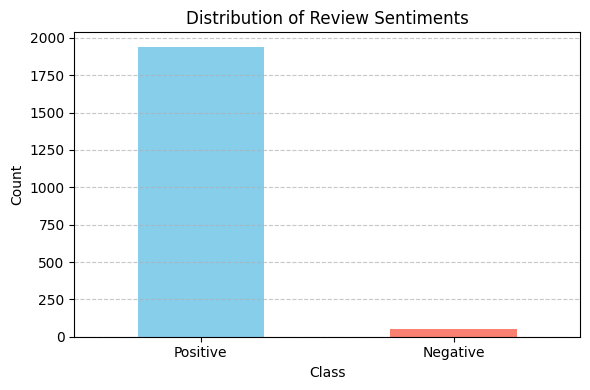

In [ ]:


# Count the class values
class_counts = Abjad_reviews['class'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
print(class_counts)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:


# Step 1: Combine all reviews into one text
all_text = ' '.join(Abjad_reviews['review'].dropna().astype(str))

# Step 2: Normalize and tokenize (remove punctuation, lowercase, split)
# You can adjust regex for more accurate Arabic tokenization if needed
words = re.findall(r'\b\w+\b', all_text)

# Step 3: Count word frequencies
word_counts = Counter(words)

# Step 4: Convert to DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Step 5: Get top 100 repeated words
top_100_words = word_freq_df.sort_values(by='count', ascending=False).head(100).reset_index(drop=True)

# Preview
print(top_100_words)

    word  count
0     ŸÖŸÜ   4458
1     ŸÅŸä   4190
2      Ÿà   2616
3    ÿπŸÑŸâ   2058
4     ÿ£ŸÜ   1836
..   ...    ...
95  ÿ®ÿ¥ŸÉŸÑ    166
96  Ÿàÿßÿ≠ÿØ    164
97   ŸáŸÜÿß    164
98  ÿ±ÿ≠ŸÑÿ©    162
99  ÿ¨ŸÖŸäÿπ    160

[100 rows x 2 columns]


In [ ]:
def column_to_wordcloud(df, column, font_file, stopwords):

    text = " ".join(arabic_reshaper.reshape(t) for t in df[column].dropna())
    # create and display the wordcloud
    wordcloud = WordCloud(font_path=font_file, width = 3500, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False,
                      stopwords = stopwords).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()



In [ ]:
stopwords = pd.read_csv("/content/arabic_dialects_stopwords.csv")["word"].tolist()
stopwords = [arabic_reshaper.reshape(s) for s in stopwords]
print(len(stopwords))

1997


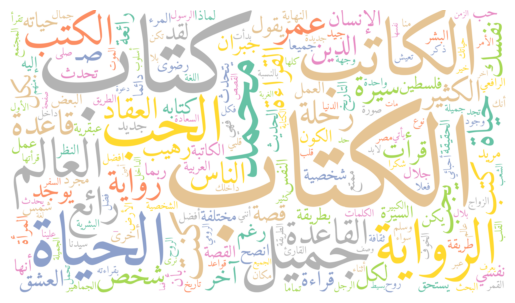

In [ ]:
column_to_wordcloud(Abjad_reviews,"review","/content/Amiri-Regular.ttf",stopwords)